# Introduction
This project aims to create a sentiment classifier to perform sentiment analysis on an Airbnb listings. As the dataset is very large, I will be selecting only 1 unique listing as the focus of this project.

## Ingesting Airbnb data
Source: https://insideairbnb.com/get-the-data/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
url = 'https://data.insideairbnb.com/singapore/sg/singapore/2025-09-28/data/reviews.csv.gz'
df = pd.read_csv(url)
print(df.shape)
df.tail()

(38350, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
38345,1486242516753075161,1495372723335409790,2025-08-25,79427140,Wilfred,"Nice host, nice place, quiet and tranquil, rooftop space with a pool (currently closed) etc. <br/>Thank you Nigel 🙂"
38346,1491162043816775904,1507048808726729363,2025-09-10,238798910,Erick,"Muy buen lugar, bien ubicado y excelente precio, la verdad volvería"
38347,1495667656926912375,1498988983929319506,2025-08-30,706909577,Giftsy,"Our stay at the ""Garden view + Large Pool"" apartment was excellent. The property is a true oasis in the city. The apartment was very spacious and felt like a modern, comfortable home away from home. We loved waking up to the lush garden view every morning. The highlight was definitely the large pool, which was always clean and a great way to cool off after a day of sightseeing. The location was also very convenient, with easy access to public transport, only 7 min to MRT Pasir. The host was a pleasure to communicate with. We highly recommend this apartment and hope to return one day!"
38348,1495667656926912375,1502845073940465988,2025-09-04,35118871,Passarada,We are happy with the apartment and the location. <br/>The pool is really amazing. <br/>The garden view is relaxing.<br/>The place is suitable for 3 of us. <br/>It is value for money.
38349,1495667656926912375,1504269274046384611,2025-09-06,38760919,Wasinee,The place is comfy and convenient. <br/>Pool is huge and relaxing. <br/>It fit well with 3 members. of my family. <br/>There is a 7-Eleven near by with a few min walk. <br/>The Mall & MRT is in walkable distance. <br/>The host is very helpful and kind. <br/>Everything was perfect for our stay.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38350 entries, 0 to 38349
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     38350 non-null  int64 
 1   id             38350 non-null  int64 
 2   date           38350 non-null  object
 3   reviewer_id    38350 non-null  int64 
 4   reviewer_name  38350 non-null  object
 5   comments       38338 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.8+ MB


### Selecting target property
To manage computational resources and training time, I will select a property (**listing 42081657**) with only around 500 reviews.

In [4]:
df.groupby('listing_id')['comments'].count().sort_values(ascending=False).head(5)

,comments
listing_id,
47945468,1298
48033351,960
48019222,759
1077066160280158672,517
42081657,505


In [5]:
df = df[df['listing_id']==42081657].copy() # keep only target property
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
21950,42081657,608540588,2020-02-21,254033172,Joy,"clean, amazing features,fast responses , couldn't ask for a better host and place!"
21951,42081657,622446567,2020-04-15,343393981,Ng Thiam Hock,Very nice and clean place for staying
21952,42081657,622500550,2020-04-16,342752651,Emma,Overall is fine
21953,42081657,629413299,2020-06-14,171826939,Ain,great place
21954,42081657,635814716,2020-07-08,163650600,Ranga,A place to never miss


## Data cleaning

The primary column that I will be working with is 'comments'. This column contains dirty data such as:
* HTML break tags
```
Nice host, nice place, quiet and tranquil, rooftop space with a pool (currently closed) etc. <br/>Thank you Nigel 🙂
```
* Non-English text
```
Muy buen lugar, bien ubicado y excelente precio, la verdad volvería
```

In [6]:
df.drop(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name'], axis=1, inplace=True) # remove unneeded columns
df.dropna(inplace=True) # remove null values
df.drop_duplicates(inplace=True) # remove duplicates
print(df.shape)
df.head()

(502, 1)


,comments
21950,"clean, amazing features,fast responses , couldn't ask for a better host and place!"
21951,Very nice and clean place for staying
21952,Overall is fine
21953,great place
21954,A place to never miss


### Remove HTML tags

In [7]:
import re

def clean_html(text):
    if not isinstance(text, str):
        return text
    pattern = r'\s*<br\s*/?>\s*'
    text = re.sub(pattern, ' ', text, flags=re.IGNORECASE)

    return text

df['comments'] = df['comments'].apply(clean_html)

### Remove non-English reviews

In [8]:
pip install langdetect

In [9]:
from langdetect import detect, LangDetectException

def eng_filter(text):
    if not isinstance(text, str):
        return False # remove if not string
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False

df = df[df['comments'].apply(eng_filter)].copy()

In [10]:
print(df.shape)
df.tail()

(373, 1)


,comments
22448,Had a great stay at this place. Very close to the mrt and easy check in. Cleanliness can be improved but overall satisfied with the place!
22450,"Nice location though it was a bit tight for a family of four, otherwise, recommended. Very , very quick responses from the hosts as though they were on-line 24/7. 😀 We asked to give us some additional towels and they did it instantly! Absolutely super hosts! Thank you, guys!"
22452,"The rooms is in a great location, close to the MRT, shops, excellent coffee shop nearby and restaurants. The staff was kind and helpful . The room was unclean, very dusty, dirty bathrooms and smelled like mould. The 1st room we had the A/C was very noisy. The other room we were given as alternative when we complained was just dirty, but had the bonus of 4 cockroaches we had to kill over a week... On the day before we signed out they had pest control in. I would avoid this disaster and just find another place."
22453,Great location. Accessible to a lot of places. Will book again for sure.
22454,"It was a really nice stay -- we are a group of 3, and the room perfectly meets our requirements."


### Saving cleaning steps as function

In [11]:
def clean_text(df, text_col):
  df.dropna(inplace=True) # drop null
  df.drop_duplicates(inplace=True) # drop duplicates
  df[text_col]=df[text_col].apply(clean_html).copy() # remove html breaks
  df=df[df[text_col].apply(eng_filter)].copy() # remove non-english reviews
  return df

## Ingesting training data (Trip Advisor Hotel Reviews)
As there is no label for the Airbnb data, I will be using another dataset from a similar domain (hotel) to train the model.

Source: https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/trip-advisor-hotel-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'trip-advisor-hotel-reviews' dataset.
Path to dataset files: /kaggle/input/trip-advisor-hotel-reviews


In [13]:
import os
print(os.listdir(path))

['tripadvisor_hotel_reviews.csv']


In [14]:
train_df = pd.read_csv(os.path.join(path, 'tripadvisor_hotel_reviews.csv'))
print(train_df.shape)
train_df.head()

(20491, 2)


,Review,Rating
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 65f 74 2 degrees warm try cover face night bright blue light kept, got room night no, 1st drop desk, called maintainence came look thermostat told play settings happy digital box wo n't work, asked wakeup 10am morning did n't happen, called later 6pm nap wakeup forgot, 10am wakeup morning yep forgotten.the bathroom facilities great room surprised room sold whirlpool bath tub n't bath amenities, great relax water jets going,",3
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish n

### Creating label

In [15]:
# maping labels: negative for ratings < 3, neutral for ratings = 3, and positive for ratings > 3
train_df['sentiment'] = train_df['Rating'].map({1: 'neg', 2: 'neg', 3: 'neutral', 4: 'pos', 5: 'pos'})
train_df.drop('Rating', axis=1, inplace=True)
print(train_df.shape)
train_df.head()

(20491, 2)


,Review,sentiment
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",pos
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",neg
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 65f 74 2 degrees warm try cover face night bright blue light kept, got room night no, 1st drop desk, called maintainence came look thermostat told play settings happy digital box wo n't work, asked wakeup 10am morning did n't happen, called later 6pm nap wakeup forgot, 10am wakeup morning yep forgotten.the bathroom facilities great room surprised room sold whirlpool bath tub n't bath amenities, great relax water jets going,",neutral
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cos

### Downsampling and balancing
The training dataset contains over 20000 rows.

To reduce training time and computing power, I will only train on reviews containing less than 80 words and 500 samples of each class.

In [16]:
# filters for less than 80 words
word_count = train_df['Review'].str.split().str.len()
train_df = train_df[word_count < 80].copy()

#resampling
bal_df = train_df.groupby('sentiment', group_keys=False).sample(n=500, random_state=42)
bal_df['sentiment'].value_counts()

,count
sentiment,
neg,500
neutral,500
pos,500


### Text processing

In [17]:
bal_df = clean_text(bal_df, 'Review')
bal_df.shape

(1499, 2)

# Transfer learning
I will be applying transfer learning by doing feature extraction with DistilBERT then training a logistic regression model for classification.

## Feature extraction with DistilBERT

In [18]:
import transformers as ppb
import torch
from torch.utils.data import DataLoader, TensorDataset
import warnings
warnings.filterwarnings('ignore')

In [19]:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel,
                                                    ppb.DistilBertTokenizer,
                                                    'distilbert-base-uncased')

tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Loading weights:   0%|          | 0/100 [00:00<?, ?it/s]

DistilBertModel LOAD REPORT from: distilbert-base-uncased
Key                     | Status     |  | 
------------------------+------------+--+-
vocab_layer_norm.weight | UNEXPECTED |  | 
vocab_transform.weight  | UNEXPECTED |  | 
vocab_layer_norm.bias   | UNEXPECTED |  | 
vocab_transform.bias    | UNEXPECTED |  | 
vocab_projector.bias    | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


### Tokenization

In [20]:
# create list of comments to speedup tokenization instead of iterating row by row
text = bal_df['Review'].tolist()

tokenized = tokenizer(text,
                      padding=True, # padding & masking
                      return_tensors='pt') # return as tensor to skip list conversion step

input_ids = tokenized['input_ids']
attention_mask = tokenized['attention_mask']

print(input_ids.shape)
print(attention_mask.shape)

torch.Size([1499, 141])
torch.Size([1499, 141])


### Batching

In [21]:
dataset = TensorDataset(input_ids, attention_mask) # store tensors
dataloader = DataLoader(dataset, batch_size=32, shuffle=False) # batching for efficiency

### Embedding

In [22]:
embeddings = []

with torch.no_grad():
    for batch, batch_mask in dataloader:
        outputs = model(batch, attention_mask=batch_mask)
        batch_output = outputs[0][:, 0, :].numpy() # get CLS token only
        embeddings.append(batch_output)

x = np.concatenate(embeddings, axis=0)
print(x.shape)

(1499, 768)


### Saving embedding steps as function

In [23]:
def embed(text):
  # tokenization
  tokenized = tokenizer(text,
                        padding=True, # padding & masking
                        return_tensors='pt') # return as tensors to skip list conversion step

  # batching
  dataset = TensorDataset(tokenized['input_ids'],
                          tokenized['attention_mask'])
  dataloader = DataLoader(dataset, # batching for efficiency
                          batch_size=32,
                          shuffle=False)

  #embedding
  embeddings = []
  with torch.no_grad():
    for batch, batch_mask in dataloader:
      outputs = model(batch, attention_mask=batch_mask)
      batch_output = outputs[0][:, 0, :].numpy() # extraxt CLS token only
      embeddings.append(batch_output)

  x = np.concatenate(embeddings, axis=0)
  return x

## Creating classification model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

### Train test split

In [ ]:
# encoding labels
label_map = {'neg': 0, 'neutral': 1, 'pos': 2}
y = np.array([label_map[i] for i in bal_df['sentiment']])

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

### Using grid search to find best parameters

In [27]:
parameters = {'C': np.linspace(0.0001, 100, 20)}
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial'),
                           parameters)
grid_search.fit(x_train, y_train)

print('best param: ', grid_search.best_params_)
print('best score: ', grid_search.best_score_)

best param:  {'C': np.float64(5.263252631578947)}
best score:  0.701415620641562


### Evaluation

In [28]:
lr = grid_search.best_estimator_
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred, target_names=['neg','neutral','pos']))

              precision    recall  f1-score   support

         neg       0.76      0.74      0.75       100
     neutral       0.55      0.56      0.55       100
         pos       0.75      0.75      0.75       100

    accuracy                           0.68       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.68      0.68      0.68       300



<Axes: >

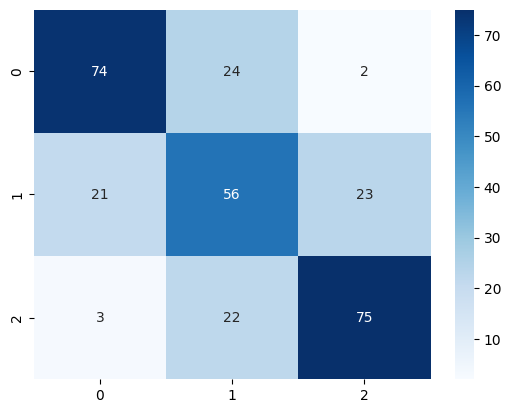

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues')

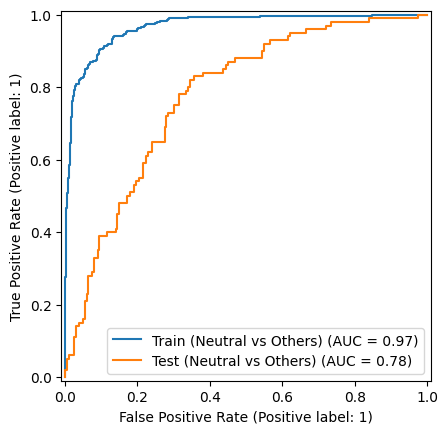

In [30]:
y_train_proba = lr.predict_proba(x_train)[:, 1]
y_test_proba = lr.predict_proba(x_test)[:, 1]

y_train_binary_neutral = (y_train == 1).astype(int)
y_test_binary_neutral = (y_test == 1).astype(int)

fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(y_train_binary_neutral, y_train_proba, ax=ax, name="Train (Neutral vs Others)")
RocCurveDisplay.from_predictions(y_test_binary_neutral, y_test_proba, ax=ax, name="Test (Neutral vs Others)")
plt.show()

## Tuning model
The model seems to be struggling with neutral sentiments, and the ROC curve shows overfitting. I will tune the model by:
* Using log scale for regularization
* Exploring l1 / l2 penalties
* switch to macro-F1 as metric

              precision    recall  f1-score   support

         neg       0.75      0.81      0.78       100
     neutral       0.61      0.60      0.61       100
         pos       0.81      0.76      0.78       100

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



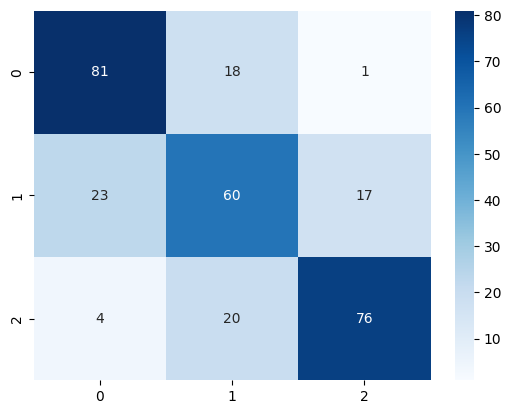

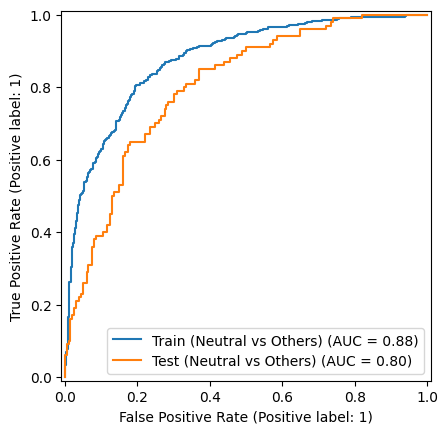

In [31]:
parameters = {
    'C': np.logspace(-10, 1, 10),
    'penalty': ['l1','l2']
    }

clf = LogisticRegression(multi_class='multinomial')

grid_search = GridSearchCV(clf, parameters, scoring='f1_macro')
grid_search.fit(x_train, y_train)

lr2 = grid_search.best_estimator_
y_pred2 = lr2.predict(x_test)
print(classification_report(y_test, y_pred2, target_names=['neg','neutral','pos']))

sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='g', cmap='Blues')
plt.show()

y_train_proba = lr2.predict_proba(x_train)[:, 1]
y_test_proba = lr2.predict_proba(x_test)[:, 1]

y_train_binary_neutral = (y_train == 1).astype(int)
y_test_binary_neutral = (y_test == 1).astype(int)

fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(y_train_binary_neutral, y_train_proba, ax=ax, name="Train (Neutral vs Others)")
RocCurveDisplay.from_predictions(y_test_binary_neutral, y_test_proba, ax=ax, name="Test (Neutral vs Others)")
plt.show()

# Predicting Airbnb data

In [32]:
x_airbnb = df['comments'].tolist()
df['sentiment'] = lr2.predict(embed(x_airbnb))

In [33]:
df['sentiment'] = df['sentiment'].map({0: 'neg', 1: 'neutral', 2: 'pos'})
df

,comments,sentiment
21950,"clean, amazing features,fast responses , couldn't ask for a better host and place!",pos
21951,Very nice and clean place for staying,pos
21952,Overall is fine,neutral
21953,great place,pos
21954,A place to never miss,pos
...,...,...
22448,Had a great stay at this place. Very close to the mrt and easy check in. Cleanliness can be improved but overall satisfied with the place!,pos
22450,"Nice location though it was a bit tight for a family of four, otherwise, recommended. Very , very quick responses from the hosts as though they were on-line 24/7. 😀 We asked to give us some additional towels and they did it instantly! Absolutely super hosts! Thank you, guys!",pos
22452,"The rooms is in a great location, close to the MRT, shops, excellent coffee shop nearby and restaurants. The staff was kind and helpful . The room was unclean, very dusty, dirty bathrooms and smelled like mould. The 1st room we had the A/C was very noisy. The other room we were given as alternative when we complained was just dirty, but had the bonus of 4 cockroaches we had to kill over a week... On the day before we signed out they had pest control in. I would avoid this disaster and just find another place.",neg
22453,Great location. Accessible to a lot of places. Will book again for sure.,pos


In [38]:
df['sentiment'].value_counts(normalize=True)

,proportion
sentiment,
pos,0.64
neutral,0.30
neg,0.06


In [36]:
print(df[df['sentiment']=='neg'].shape)
df[df['sentiment']=='neg']

(21, 2)


,comments,sentiment
21995,The room was clean. Check-in and communication with the host were smooth. Staff were friendly and accomodating. Our only problem was the toilet. There wasn't a lock for the toilet inside the room. There also wasn't any space in the bathroom to hang your dry clothes.,neg
21996,"Nice place. The room was small forbfour people, but we knew that already. The space was amazingly well utilized, and space is a luxory in SG. Very centrally located and clean. unfortunatelu there was a construction site on both sides of the building that made it a bit noisy. The check in process was overly complicated but we got all the help we needed from the staff.",neg
22059,"I was very disappointed when I stepped into my room because it looked so different from the picture I saw online. There were a few stains on the wall, and the floor in the bathroom was wet. Also, the room was a little bit dim, even with the light. What made me immediately book another hotel, even though I had paid the cost for five nights and knew that it was not refundable, was the construction noise. It was not bearable at all. However, the lady at the front desk was helpful and tried to offer help. Please think twice before making a reservation at this hotel!!",neg
22130,Tiny but good value for money in Singapore for a family,neg
22136,"Totally bad with the construction outside. Noisy, dangerous and hard to go in & out as the only way in is through the back lane. Noise was loud during day time and also on Sunday morning.",neg
22155,all good except thatvthe lift was mot available during the first day of out chrck in/day.,neg
22158,see u in the next trip,neg
22177,"It's all good. It's just small for the 4 for us. But we only stayed for 3 nights, so it was bearable.",neg
22217,We havent got an idea that the elevator bangs and slams most of the time having no good rest and sleep we expect a quiet and peaceful place to stay but its just an imagination.. cant recommend to someone😩😩😩,neg
22224,Not worth the money. only positive was location.,neg


## Analysis
The overall guest perception is positive, though some operational friction points exist.

### Favorable Guest Satisfaction (64% Positive)

Guests frequently praise the location ("Easy to find") and the high level of service provided by the staff ("easy to talk to, and very professional"). This indicates that the property's personnel and geographic convenience are its strongest assets.

### High Volume of Neutral Sentiments (30%)

Neutral reviews frequently contain mixed sentiments (e.g., praising the location but mentioning a minor inconvenience) or purely factual statements without strong emotional vocabulary.

### Low Attrition Rate (6% Negative) with Specific Pain Points

Only 21 out of 372 reviews were flagged as negative. While this low volume is excellent, isolating these 21 reviews reveals recurring issues that disrupt the guest experience:

 * **External Noise:** Multiple guests complained about noise from adjacent construction sites ("noisy skyscraper construction all night", "construction site on both sides").

* **Internal Noise:** Some guests reported disruptive noises from the elevator ("elevator bangs and slams").

* **Bathroom**: A few reviews highlighted complains regarding bathroom maintenance (e.g., sliding doors not locking, poor drainage, sewer smells and no hot water).



## Recommendations for the Property Owner

**1. Manage Guest Expectations**

Update Listing Description: Since construction noise is a recurring external issue beyond the owner's control, proactively stating this in the Airbnb listing will manage guest expectations before they book.

Provide Comfort Amenities: To mitigate the construction and elevator noise, the owner could provide complimentary earplugs in every room.

**2.  Prioritize Targeted Maintenance**

Some reviews point to specific infrastructure issues (elevator noise, plumbing/sewer smells, broken AC, and faulty bathroom locks). The owner should identify which specific room numbers correlate with these complaints and temporarily block them from being booked until plumbing and soundproofing repairs are completed.

Improve Shower Facilities: Ensure hot water heaters are consistently serviced and that bathroom ventilation is improved to resolve the lingering odor issues mentioned.

**3. Elevate the "Neutral" Experience**

Enhance the Check-in Process: One review noted the check-in was "overly complicated." Streamlining this process (e.g., using a clear visual guide, a digital lockbox, or a pre-arrival WhatsApp message) will provide a good first impression.

Leverage Staff Strengths: Since the staff is frequently praised, empower them to add personalized touches (e.g., a handwritten welcome note or local dining recommendations). These low-cost, high-impact gestures are proven to convert "neutral" stays into positive reviews.

# Model limitations

**Privacy and Data Anonymization**

This project took steps to anonymize the data by dropping explicit personally identifiable columns, such as ```reviewer_id``` and ```reviewer_name```.

However, a residual privacy risk remains within the unstructured text column. Guests frequently include names of hosts or travel companions in their reviews (e.g., "Thank you Nigel"). While this dataset is public, deploying the model in a private enterprise would require additional processing steps, such as using Named Entity Recognition (NER) to mask names and sensitive details before the data is stored or processed.

**Fairness and Representation Bias**

The data cleaning process intentionally filtered out non-English reviews to simplify the project, this decision introduces representation bias. By excluding non-English feedback, the model silences the voices of international guests from non-English-speaking regions.

Additionally, training the model on a general TripAdvisor dataset introduces a domain and cultural shift. The model may struggle to accurately evaluate Singlish or localized terms found in the Singaporean Airbnb reviews. A fair model would require a diverse, multilingual training dataset that accurately reflects the property's global guest demographic.

**Accuracy and Labeling Assumptions**

The project relied on proxy labeling, assuming that a 3-star TripAdvisor rating equates to a "Neutral" sentiment. In reality, a 3-star review may contain highly polarized statements (e.g., "The location was amazing, but the room was filthy").

Because the model struggles most with this neutral class, there is a risk of misclassifying actionable negative feedback as neutral. If severe complaints—such as safety concerns or hygiene issues—are absorbed into the neutral category, the property owner might fail to address critical problems.

**Accountability**

The property owners must be aware of the model's limitations (73% accuracy rate and 60% recall in neutral class) and accountable for how they interpret insights. High-stakes decisions, such as firing a cleaning vendor based on "negative" sentiment trends, should always involve human-in-the-loop verification.

**Transparency and Explainability**

While the logistic regression classifier is highly interpretable, the DistilBERT embeddings is a "black box." It is difficult to explain exactly which words or phrases triggered a specific sentiment prediction. Future iterations of this project could incorporate explainable AI (XAI) tools to highlight the specific keywords driving the model's decisions.